# WEP Lecture 3

# Part 1. Classification

In the first part we will try to classify handwritten digits by using multiple Machine Learning methods.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**1.1 Looking at the data** 

In [2]:
#Load the data
mnist_data = pd.read_csv('sample_data/mnist_train_small.csv').values
mnist_data = pd.DataFrame(mnist_data)

In [3]:
#How many examples are present in the data?
print(len(mnist_data))

19999


In [4]:
#Show the the first 5 rows of the data using the head()-function
mnist_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
#Print one instance from the data
np.array(mnist_data.loc[0])

array([  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  28,  59,  50,   0,
        23,   0,   0,  32, 134, 180, 254, 206,   8,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   4,  96, 216, 23

In [6]:
#Show the number of times each digit is in the data. 
mnist_data[0].value_counts()

1    2243
7    2126
6    2038
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [7]:
#Here we split the the data into the labels and the features
digits = mnist_data[0]
pixels = mnist_data.drop(0, axis=1)
print("Shape of labels = ", np.shape(digits))
print("Shape of features = ", np.shape(pixels))

Shape of labels =  (19999,)
Shape of features =  (19999, 784)


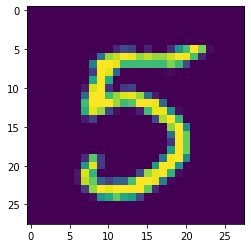

Label =  5
Pixel values =  1      0
2      0
3      0
4      0
5      0
      ..
780    0
781    0
782    0
783    0
784    0
Name: 0, Length: 784, dtype: int64


In [8]:
#This output shows you the label and the pixel values of an example image. 
plt.imshow(pixels.loc[0].values.reshape(28,28))
plt.show()
print("Label = ", digits[0])
print("Pixel values = ", pixels.loc[0])

**1.2 Create train and test set**

In the next step we will split the data into a train set and a test set. We will use sklearn's function called 'train_test_split'. We want the train set to be 70% of the data, and the test set 30%. Look at the documentation https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html and try to find out what needs to be filled in below.

In [9]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pixels, digits, test_size=0.3)

In [10]:
#Test yourself: do the data sets have the correct shape?
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))
print(np.shape(y_test))

(13999, 784)
(13999,)
(6000, 784)
(6000,)


**1.3 Logistic Regression**

Now we can create a Logistic Regression classifier. We will use LogisticRegression(solver='saga'). You can leave other parameters to their default values. Instantiate the classifier, fit the model and make a prediction.

You can look at the documentation for more information https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.


In [11]:
from sklearn.linear_model import LogisticRegression
#Instantiate the classifier, fit the model and make a prediction.
clf1 = LogisticRegression(solver='saga')
clf1.fit(X_train, y_train)
pred1 = clf1.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [12]:
probas = clf1.predict_proba(X_test)
print(y_test.head(1))
print(probas[0])

8668    0
Name: 0, dtype: int64
[9.60947782e-01 5.74599208e-12 3.31127270e-03 1.55870381e-03
 2.08136397e-03 3.36544490e-04 1.22018935e-05 3.60478120e-04
 3.01802062e-02 1.21144696e-03]


To evaluate the performance of the classifier we can look at the accuracy. Look at the documentation for the accuracy score https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html to calculate the accuracy.

In [13]:
from sklearn.metrics import accuracy_score
#Calculate the accuracy
accuracy1 = accuracy_score(y_test, pred1)
print("Accuracy = ", accuracy1)

Accuracy =  0.8985


Plot the confusion matrix to see how often the digits get classified correctly, and which mistakes are made. You can use confusion_matrix (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix. Try to determine which digits often get mistaken for each other.

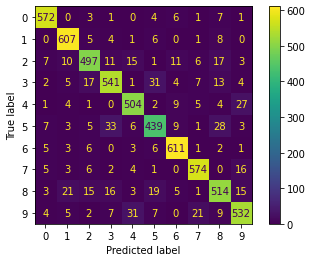

In [14]:
from sklearn.metrics import confusion_matrix
#Create the confusion matrix
cm1 = confusion_matrix(y_test, pred1)

#Which digits get often confused for each other?
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

**1.4 Random Forest**

Similar to the Logistic Regression classifier, we can make a Random Forest classifier. 

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [15]:
from sklearn.ensemble import RandomForestClassifier
#Instantiate the classifier, fit the model and make a prediction.
clf2 = RandomForestClassifier()
clf2.fit(X_train, y_train)
pred2 = clf2.predict(X_test)

In [16]:
accuracy2 = accuracy_score(y_test, pred2)
print("Accuracy = ", accuracy2)

Accuracy =  0.9506666666666667


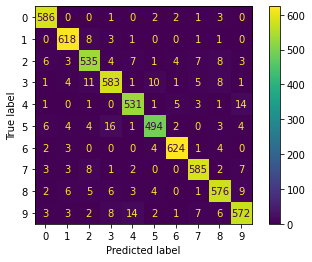

In [17]:
#Create the confusion matrix
cm2 = confusion_matrix(y_test, pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()

**1.5 Neural Network**

Finally, we will train a neural network for the classification task. We will use a Multi-Layer Perceptron classifier.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

In [18]:
from sklearn.neural_network import MLPClassifier
#Instantiate the classifier, fit the model and make a prediction.
clf3 = MLPClassifier()
clf3.fit(X_train, y_train)
pred3 = clf3.predict(X_test)

In [19]:
accuracy3 = accuracy_score(y_test, pred3)
print("Accuracy = ", accuracy3)

Accuracy =  0.9311666666666667


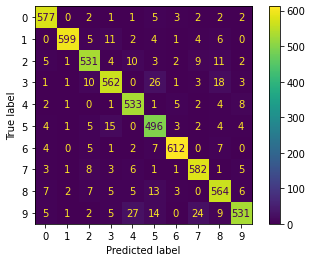

In [20]:
#Create the confusion matrix
cm3 = confusion_matrix(y_test, pred3)

disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()

# Part 2

In this part we will look at the COMPAS dataset. Run the cells below to get ready to work with fairness!

**2.1 Loading the data**



In [21]:
!pip install aif360
!pip install fairlearn

     |████████████████████████████████| 175 kB 5.2 MB/s 
     |████████████████████████████████| 564 kB 58.3 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31285 sha256=864942f328a406841d7fd997208bb809a91b5e1f251920342922da7622b925e5
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler
     |████████████████████████████████| 177 kB 5.2 MB/s 


In [22]:
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions\
        import load_preproc_data_compas
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.metrics import ClassificationMetric
from copy import deepcopy

In [23]:
!wget -c https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
!mv compas-scores-two-years.csv /usr/local/lib/python3.7/dist-packages/aif360/data/raw/compas

compas_data = load_preproc_data_compas()

--2022-01-10 10:41:02--  https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2546489 (2.4M) [text/plain]
Saving to: ‘compas-scores-two-years.csv’

compas-scores-two-y 100%[===================>]   2.43M  --.-KB/s    in 0.06s   

2022-01-10 10:41:02 (37.9 MB/s) - ‘compas-scores-two-years.csv’ saved [2546489/2546489]



**2.2 Looking at the data**

In [24]:
#What features are used?
compas_data.feature_names

['sex',
 'race',
 'age_cat=25 to 45',
 'age_cat=Greater than 45',
 'age_cat=Less than 25',
 'priors_count=0',
 'priors_count=1 to 3',
 'priors_count=More than 3',
 'c_charge_degree=F',
 'c_charge_degree=M']

In [25]:
#What is the label, and what does the label mean?
label = compas_data.label_names
fav = compas_data.favorable_label
unfav = compas_data.unfavorable_label
print("Label = ", label)
print("Favorable label = ", fav)
print("Unfavorable label = ", unfav)

Label =  ['two_year_recid']
Favorable label =  0.0
Unfavorable label =  1.0


In the data, sex is divided in 0 = man, and 1 = women. Race is divided into 0 = African-American, and 1 = Caucasian. 

In [26]:
#What do you notice in the distribution of the data?
compas_data.convert_to_dataframe()[0].groupby(['race','sex','two_year_recid'])['two_year_recid'].count()

race  sex  two_year_recid
0.0   0.0  0.0               1168
           1.0               1458
      1.0  0.0                346
           1.0                203
1.0   0.0  0.0                969
           1.0                652
      1.0  0.0                312
           1.0                170
Name: two_year_recid, dtype: int64

In [27]:
priv_group   = [{'race': 1, 'sex' : 1}]  # Caucasian woman
unpriv_group = [{'race': 0, 'sex': 0}]  # African-American man

In [28]:
#The base rate tells you the percentage of positive outcomes. What do you notice?
metric_orig = BinaryLabelDatasetMetric(compas_data, unprivileged_groups=unpriv_group, privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = %f" % metric_orig.base_rate(False)) 
print("Percentage of positive outcomes for the privileged group = %f" % metric_orig.base_rate(True)) 

Percentage of positive outcomes for the unprivileged group = 0.444783
Percentage of positive outcomes for the privileged group = 0.647303


**2.3 Creating a classifier**

We have looked at the original data. But what happens if we train a classifier on this biased data set?

Start by splitting the data in a train and a test set.

In [29]:
train_data, test_data = compas_data.split([0.8], shuffle=True)
X_train = train_data.features
y_train = train_data.labels.ravel()
X_test = test_data.features
y_test = test_data.labels

We will look at the base rates in the train and the test data.

In [30]:
#Train data
metric_train = BinaryLabelDatasetMetric(train_data, unprivileged_groups=unpriv_group, privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = %f" % metric_train.base_rate(False)) 
print("Percentage of positive outcomes for the privileged group = %f" % metric_train.base_rate(True)) 

Percentage of positive outcomes for the unprivileged group = 0.446829
Percentage of positive outcomes for the privileged group = 0.653944


In [31]:
#Test data
metric_test = BinaryLabelDatasetMetric(test_data, unprivileged_groups=unpriv_group, privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = %f" % metric_test.base_rate(False)) 
print("Percentage of positive outcomes for the privileged group = %f" % metric_test.base_rate(True)) 

Percentage of positive outcomes for the unprivileged group = 0.436673
Percentage of positive outcomes for the privileged group = 0.617978


In [32]:
#Create a classifier
clf_compas = LogisticRegression()
clf_compas.fit(X_train, y_train)
pred_compas = test_data.copy(deepcopy = True)
pred_compas.labels = clf_compas.predict(X_test)

0.6723484848484849


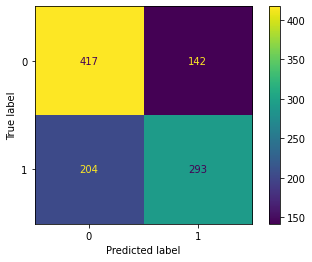

In [33]:
#Evaluate the model
print(accuracy_score(y_test, pred_compas.labels))
cm = confusion_matrix(y_test, pred_compas.labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [34]:
#Now look at the percentage of positive outcomes for both groups in the predictions. What happened?
metric2 = BinaryLabelDatasetMetric(pred_compas, unprivileged_groups=unpriv_group, privileged_groups=priv_group)
print("Percentage of positive outcomes for the unprivileged group = %f" % metric2.base_rate(False)) 
print("Percentage of positive outcomes for the privileged group = %f" % metric2.base_rate(True)) 

Percentage of positive outcomes for the unprivileged group = 0.455577
Percentage of positive outcomes for the privileged group = 0.820225


# Part 3

In the final part we will look at the fairness of the classifier trained on the COMPAS data set. We create a Classification Metric, and use its methods to calculate multiple fairness measures.
https://aif360.readthedocs.io/en/latest/modules/generated/aif360.metrics.ClassificationMetric.html

In [35]:
#We create a Classification metric
fairness_metric = ClassificationMetric(test_data, pred_compas, unprivileged_groups= unpriv_group, privileged_groups= priv_group)

In [36]:
#Calculate the Statistical Parity difference and the Disparate Impact (ratio)
statistical_parity_difference = fairness_metric.statistical_parity_difference()
disparate_impact = fairness_metric.disparate_impact()
print("statistical parity difference =", statistical_parity_difference)
print("disparate impact =", disparate_impact)

statistical parity difference = -0.3646481595548098
disparate impact = 0.5554289561592045


In [37]:
#Calculate the True Positive Rate for the privileged and the unprivileged group, and their difference
TPR_priv = fairness_metric.true_positive_rate(privileged=True)
TPR_unpriv = fairness_metric.true_positive_rate(privileged=False)
TPR_difference = fairness_metric.true_positive_rate_difference()
print("TPR (priv_group) =", TPR_priv) #TPR for privileged group
print("TPR (unpriv_group) =", TPR_unpriv) #TPR for unprivileged group
print("TPR difference =", TPR_difference) #TPR difference

TPR (priv_group) = 0.8545454545454545
TPR (unpriv_group) = 0.658008658008658
TPR difference = -0.19653679653679645


In [38]:
#Use the consistency metric to calculate individual fairness
consistency = fairness_metric.consistency()
print("Individual fairness metric that measures how similar the labels are for similar instances = %f" % consistency)

Individual fairness metric that measures how similar the labels are for similar instances = 0.615152
